<a href="https://colab.research.google.com/github/nimsara66/ML-Project/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model for Label 3

In [1]:
import pandas as pd

csv_url = "/content/drive/MyDrive/#Semester07/CS4622/ML Project/speech-based-classification-layer-9/train.csv"
data = pd.read_csv(csv_url)
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.019301,0.059756,0.081375,0.057481,-0.068440,-0.165913,0.035643,-0.091138,0.021688,0.057158,...,-0.035576,0.127319,0.098128,-0.058787,0.100971,-0.047754,45,NaN,1,6
1,0.049741,0.090030,0.035118,-0.013676,-0.194317,-0.101763,0.085875,-0.081317,0.112418,0.120523,...,0.020538,0.058968,0.029803,0.111324,0.036727,0.031927,45,NaN,1,6
2,0.019212,0.087779,0.093907,-0.033738,-0.141409,-0.062881,-0.071402,-0.006599,0.020372,-0.027777,...,0.119645,-0.040861,0.000548,-0.061003,-0.042450,0.063340,45,NaN,1,6
3,0.070283,0.049040,0.042126,0.122637,-0.056964,-0.113700,0.108454,0.051336,0.086610,0.141578,...,-0.124494,-0.169225,-0.046391,0.148787,0.014616,-0.140644,45,NaN,1,6
4,0.028864,0.165634,0.016302,0.036117,-0.028871,-0.147748,0.053180,0.025071,-0.004200,-0.022183,...,-0.124862,0.044907,0.084005,-0.038450,0.084371,-0.072146,45,NaN,1,6


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
print(f"data dataset shape {data.shape}")
print(f"# of missing values {data['label_3'].isna().sum()}")

data dataset shape (28520, 772)
# of missing values 0


In [3]:
class SpeechClassifier(nn.Module):
    def __init__(self):
        super(SpeechClassifier, self).__init__()
        self.conv1d_p1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=5)
        self.conv1d_p2 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=4)
        self.conv1d_p3 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=3)
        self.conv1d_s1 = nn.Conv1d(in_channels=128, out_channels=128, kernel_size=5)
        self.conv1d_s2 = nn.Conv1d(in_channels=128, out_channels=128, kernel_size=5)
        self.max_pool_p1 = nn.MaxPool1d(kernel_size=5)
        self.max_pool_p2 = nn.MaxPool1d(kernel_size=5)
        self.max_pool_p3 = nn.MaxPool1d(kernel_size=5)
        self.max_pool_s1 = nn.MaxPool1d(kernel_size=5)
        self.max_pool_s2 = nn.MaxPool1d(kernel_size=10)
        self.linear1 = nn.Linear(1024, 256)
        self.linear2 = nn.Linear(256, 2)

    def forward(self, tensors):
        # print(f"input tensors shape {tensors.shape}")
        output_p1 = self.max_pool_p1(F.relu(self.conv1d_p1(tensors)))
        # print(f"output_p1 shape {output_p1.shape}")
        output_p2 = self.max_pool_p2(F.relu(self.conv1d_p2(tensors)))
        # print(f"output_p2 shape {output_p2.shape}")
        output_p3 = self.max_pool_p3(F.relu(self.conv1d_p3(tensors)))
        # print(f"output_p3 shape {output_p3.shape}")
        output_s = torch.cat((output_p1, output_p2, output_p3), dim=2)
        # print(f"output_s shape {output_s.shape}")
        output_s1 = F.relu(self.conv1d_s1(output_s))
        # print(f"output_s1 shape {output_s1.shape}")
        output_s1 = self.max_pool_s1(output_s1)
        # print(f"output_s1 shape {output_s1.shape}")
        output_s2 = F.relu(self.conv1d_s2(output_s1))
        # print(f"output_s2 shape {output_s2.shape}")
        output_s2 = self.max_pool_s2(output_s2)
        # print(f"output_s2 after maxpool shape {output_s2.shape}")
        output_s2 = output_s2.permute(0, 2, 1)
        # print(f"output_s2 after permute shape {output_s2.shape}")
        output_f = output_s2.reshape(output_s2.size(0), -1)
        # print(f"output_f shape {output_f.shape}")
        output_l1 = torch.relu(self.linear1(output_f))
        # print(f"output_l1 shape {output_l1.shape}")
        output_l2 = self.linear2(output_l1)
        # print(f"output_l2 shape {output_l2.shape}")
        return output_l2


In [4]:
from sklearn.model_selection import train_test_split

filtered_data = data.copy()
filtered_data = filtered_data
print(f"original dataset shape {data.shape}")

X_train, X_test, y_train, y_test = train_test_split(filtered_data.iloc[:, :768], filtered_data["label_3"], test_size=0.2, stratify=filtered_data["label_3"], random_state=2023)

original dataset shape (28520, 772)


In [5]:
X_train_tensors = torch.tensor(X_train.iloc[:, :].values, dtype=torch.float32)
print(X_train_tensors.shape)

X_train_tensors = X_train_tensors.view(X_train.shape[0], 1, 768)
print(X_train_tensors.shape)

torch.Size([22816, 768])
torch.Size([22816, 1, 768])


In [9]:
# Create an instance of the FakeBERT model
speechClassifier = SpeechClassifier()

# Define a cross-entropy loss function
criterion = nn.CrossEntropyLoss()

# Create a DataLoader for batching
batch_size = 128
dataset = TensorDataset(X_train_tensors, torch.tensor(y_train.values))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define an optimizer
optimizer = torch.optim.Adam(speechClassifier.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    total_loss = 0.0
    total_correct = 0
    total_samples = 0

    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = speechClassifier(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Calculate the number of correct predictions
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == targets).sum().item()

        # Update the total number of samples processed
        total_samples += targets.size(0)

    average_loss = total_loss / len(dataloader)
    accuracy = (total_correct / total_samples) * 100.0  # Calculate accuracy as a percentage

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}, Training Accuracy: {accuracy:.2f}%")

# Save the trained model if needed
# torch.save(speechClassifier.state_dict(), 'speechClassifier_model.pth')

Epoch 1/10, Loss: 0.3758, Training Accuracy: 84.38%
Epoch 2/10, Loss: 0.0972, Training Accuracy: 96.44%
Epoch 3/10, Loss: 0.0544, Training Accuracy: 98.04%
Epoch 4/10, Loss: 0.0451, Training Accuracy: 98.31%
Epoch 5/10, Loss: 0.0340, Training Accuracy: 98.72%
Epoch 6/10, Loss: 0.0337, Training Accuracy: 98.70%
Epoch 7/10, Loss: 0.0275, Training Accuracy: 99.04%
Epoch 8/10, Loss: 0.0217, Training Accuracy: 99.15%
Epoch 9/10, Loss: 0.0167, Training Accuracy: 99.40%
Epoch 10/10, Loss: 0.0149, Training Accuracy: 99.45%


In [16]:
X_test_tensors = torch.tensor(X_test.iloc[:, :].values, dtype=torch.float32)
print(X_test_tensors.shape)

X_test_tensors = X_test_tensors.view(X_test_tensors.shape[0], 1, 768)
print(X_test_tensors.shape)

torch.Size([5704, 768])
torch.Size([5704, 1, 768])


In [11]:
# Set your model to evaluation mode
speechClassifier.eval()

# Create a DataLoader for the test set
test_dataset = TensorDataset(X_test_tensors, torch.tensor(y_test.values))
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Initialize variables to keep track of correct predictions and total samples
total_correct = 0
total_samples = 0

# Iterate through the test DataLoader
for inputs, targets in test_dataloader:
    with torch.no_grad():
        outputs = speechClassifier(inputs)

    # Calculate the number of correct predictions for this batch
    _, predicted = torch.max(outputs, 1)
    total_correct += (predicted == targets).sum().item()

    # Update the total number of samples processed
    total_samples += targets.size(0)

# Calculate test accuracy
test_accuracy = (total_correct / total_samples) * 100.0

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 99.00%


In [12]:
import pandas as pd

valid_csv_url = "/content/drive/MyDrive/#Semester07/CS4622/ML Project/speech-based-classification-layer-9/valid.csv"
valid_data = pd.read_csv(valid_csv_url)
valid_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,-0.130454,0.103857,0.130866,-0.036366,-0.152212,-0.072316,-0.041838,-0.019596,0.038727,0.022496,...,0.129246,0.018913,0.013387,-0.054259,0.006282,0.049646,45,NaN,1,6
1,0.019179,0.104888,0.079487,0.005187,-0.134111,-0.109271,0.054558,-0.083966,-0.000091,0.083015,...,-0.031823,0.061069,0.036411,0.101357,0.088504,0.008192,45,NaN,1,6
2,-0.028485,0.051889,0.033343,-0.029115,-0.091265,-0.038653,0.113460,-0.057983,0.128808,0.062455,...,-0.033106,-0.007366,-0.027673,0.052090,0.044097,0.054422,45,NaN,1,6
3,-0.078959,0.082325,0.068852,-0.028885,-0.146059,-0.071453,-0.028955,0.031253,0.034923,0.019338,...,0.164456,-0.025891,0.037993,0.012060,-0.044266,0.045405,45,NaN,1,6
4,0.001748,0.050968,-0.034524,0.074153,0.063857,-0.133338,0.102604,-0.031676,0.010629,-0.018684,...,-0.102749,0.022433,0.018421,0.086064,0.075351,-0.067089,45,NaN,1,6


In [14]:
print(f"data dataset shape {valid_data.shape}")
print(f"# of missing values {valid_data['label_3'].isna().sum()}")

data dataset shape (750, 772)
# of missing values 0


In [16]:
X_valid_tensors = torch.tensor(valid_data.iloc[:, :768].values, dtype=torch.float32)
print(X_valid_tensors.shape)

X_valid_tensors = X_valid_tensors.view(X_valid_tensors.shape[0], 1, 768)
print(X_valid_tensors.shape)

torch.Size([750, 768])
torch.Size([750, 1, 768])


In [17]:
# Set your model to evaluation mode
speechClassifier.eval()

# Create a DataLoader for the test set
test_dataset = TensorDataset(X_valid_tensors, torch.tensor(valid_data['label_3'].values))
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Initialize variables to keep track of correct predictions and total samples
total_correct = 0
total_samples = 0

# Iterate through the test DataLoader
for inputs, targets in test_dataloader:
    with torch.no_grad():
        outputs = speechClassifier(inputs)

    # Calculate the number of correct predictions for this batch
    _, predicted = torch.max(outputs, 1)
    total_correct += (predicted == targets).sum().item()

    # Update the total number of samples processed
    total_samples += targets.size(0)

# Calculate test accuracy
test_accuracy = (total_correct / total_samples) * 100.0

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 98.80%


In [18]:
# Save the trained model if needed
torch.save(speechClassifier.state_dict(), 'speechClassifier_model.pth')

# Explainability for Label 3

In [6]:
import torch

# Instantiate the model
speechClassifier = SpeechClassifier()

# Load the saved model's state dictionary
model_state_dict = torch.load('/content/drive/Shareddrives/test/speechClassifier_model.pth')

# Load the state dictionary into the model
speechClassifier.load_state_dict(model_state_dict)

# Set the model to evaluation mode if necessary
speechClassifier.eval()
print("SpeechClassifier is ready!")

SpeechClassifier is ready!


In [7]:
!pip install shap

In [9]:
import random
import numpy as np
# X_train.shape
# num = np.asarray(X_train)
# num.shape
# num = np.asarray(valid_data.iloc[:1, :768])
# num.shape
# valid_data.iloc[:1, :768]
print(X_train_tensors.shape)

random.seed(2023)

selected_indices = random.sample(range(X_train_tensors.shape[0]), 1000)

X_train_tensors_selected = X_train_tensors[selected_indices]

print(X_train_tensors_selected.shape)

torch.Size([22816, 1, 768])
torch.Size([1000, 1, 768])


In [10]:
import shap

explainer = shap.DeepExplainer(speechClassifier, X_train_tensors_selected)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [14]:
X_explain_tensor = torch.tensor(valid_data.iloc[:1, :768].values, dtype=torch.float32)
print(X_explain_tensor.shape)

X_explain_tensor = X_explain_tensor.view(X_explain_tensor.shape[0], 1, 768)
print(X_explain_tensor.shape)

torch.Size([1, 768])
torch.Size([1, 1, 768])


In [15]:
explanation = explainer.shap_values(X_explain_tensor)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [24]:
with torch.no_grad():
        output = speechClassifier(X_explain_tensor)
_, predicted = torch.max(output, 1)
predicted[0]


tensor(1)

In [42]:
X_explain_tensor[0][0].cpu().numpy()

array([-1.30454406e-01,  1.03857294e-01,  1.30866483e-01, -3.63656320e-02,
       -1.52211607e-01, -7.23161772e-02, -4.18383665e-02, -1.95959229e-02,
        3.87271605e-02,  2.24961229e-02, -2.56961249e-02, -7.62378201e-02,
       -3.72952374e-04,  6.95110932e-02,  4.04676907e-02, -8.44906643e-02,
        1.74054936e-01,  4.20257300e-02, -3.63064930e-02, -1.87876537e-01,
       -3.75257879e-02, -4.38754587e-03, -1.13719650e-01, -1.78538281e-02,
       -1.05075531e-01,  7.99959600e-02,  6.40257960e-03,  9.93370488e-02,
        5.56745119e-02,  2.28523128e-02,  1.33743655e-04,  3.80873494e-02,
       -7.62649477e-02, -1.83168205e-03,  1.33583471e-02, -6.80429414e-02,
        8.72430019e-03, -4.09737229e-02, -6.11968152e-02, -9.80239245e-04,
        4.89752516e-02,  8.40180367e-02, -8.80232677e-02, -5.07337693e-03,
       -5.78176714e-02,  1.78148255e-01, -4.35746834e-02, -4.77429368e-02,
        3.54928859e-02, -9.79046449e-02,  2.56447028e-02,  1.33276428e-03,
        1.80853501e-01,  

In [47]:
# %% >> Visualize local predictions

shap.initjs()  # Initialize the SHAP JavaScript visualization
shap.force_plot(float(explainer.expected_value[0]), explanation[0][0], X_explain_tensor[0][0].cpu().numpy().tolist())

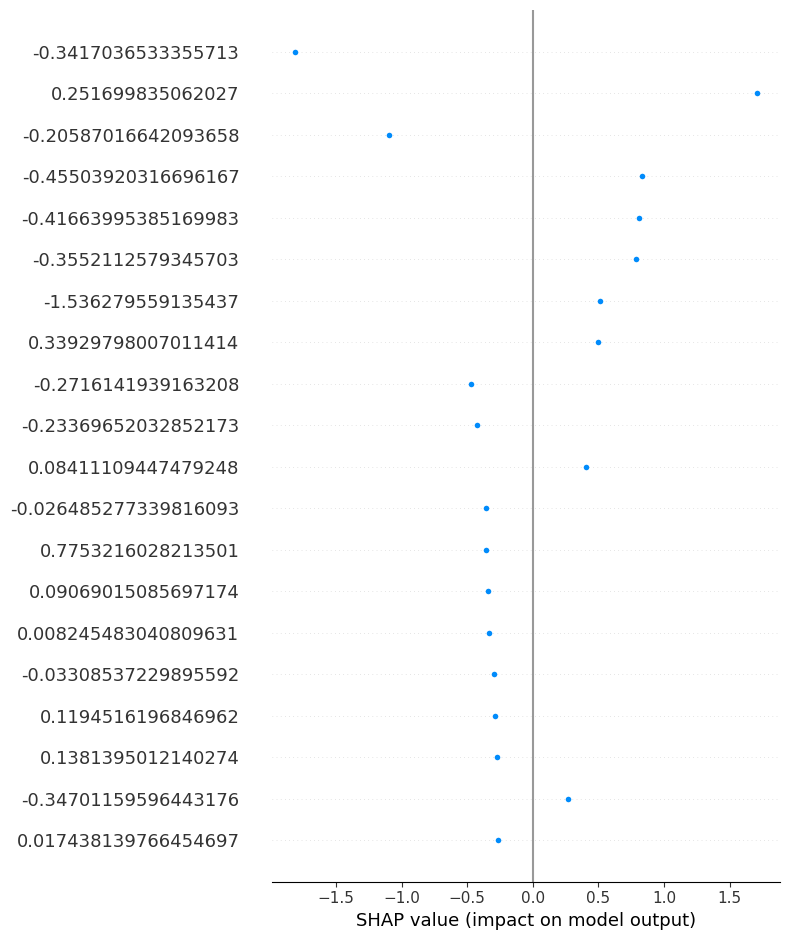

In [60]:
# %% >> Visualize global features
# Feature summary
shap.summary_plot(explanation[0].reshape(X_explain_tensor[0].shape), X_explain_tensor[0][0].cpu().numpy().tolist())

In [65]:
sorted_feature_indices.shape

(768,)

In [63]:
import numpy as np

# Reshape the SHAP values to match the input data shape
explanation_reshaped = explanation[0].reshape(X_explain_tensor[0].shape)

# Compute the absolute sum of SHAP values for each feature (feature importance)
feature_importance = np.abs(explanation_reshaped).sum(axis=0)

# Get the indices that would sort the features by importance in descending order
sorted_feature_indices = (-feature_importance).argsort()

# Print the indices of the most influential features (e.g., top 10)
top_n_features = 10
most_influential_feature_indices = sorted_feature_indices[:top_n_features]
print("Indices of the most influential features:", most_influential_feature_indices)


Indices of the most influential features: [581 291 395 547 608 319 365 352 375 607]


In [56]:
print("SHAP values shape:", explanation[0].shape)
print("Input data shape:", X_explain_tensor[0].shape)


SHAP values shape: (1, 1, 768)
Input data shape: torch.Size([1, 768])


# just learning

In [ ]:
X_train.shape

(800, 768)

In [ ]:
conv1d_p1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=5)
max_pool_p1 = nn.MaxPool1d(kernel_size=5)
conv1d_p2 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=4)
conv1d_p3 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=3)
conv1d_s1 = nn.Conv1d(in_channels=128, out_channels=128, kernel_size=5)
conv1d_s2 = nn.Conv1d(in_channels=128, out_channels=128, kernel_size=5)
max_pool_p2 = nn.MaxPool1d(kernel_size=5)
max_pool_p3 = nn.MaxPool1d(kernel_size=5)
max_pool_s1 = nn.MaxPool1d(kernel_size=5)
max_pool_s2 = nn.MaxPool1d(kernel_size=10)
linear1 = nn.Linear(1024, 256)
linear2 = nn.Linear(256, 2)

print(X_train.iloc[:1, :].shape)

X_train_tensors = torch.tensor(X_train.iloc[:, :].values, dtype=torch.float32)
print(X_train_tensors.shape)

X_train_tensors = X_train_tensors.view(800, 1, 768)
print(X_train_tensors.shape)

output_p1 = conv1d_p1(X_train_tensors)
print(output_p1.shape)

output_mp1 = max_pool_p1(F.relu(output_p1))
print(output_mp1.shape)

output_p2 = conv1d_p2(X_train_tensors)
print(output_p2.shape)

output_mp2 = max_pool_p2(F.relu(output_p2))
print(output_mp2.shape)

output_p3 = conv1d_p3(X_train_tensors)
print(output_p3.shape)

output_mp3 = max_pool_p3(F.relu(output_p3))
print(output_mp3.shape)

output_s = torch.cat((output_mp1, output_mp2, output_mp3), dim=2)
print(f"output_s shape {output_s.shape}")
output_s1 = F.relu(conv1d_s1(output_s))
print(f"output_s1 shape {output_s1.shape}")
output_s1 = max_pool_s1(output_s1)
print(f"output_s1 shape {output_s1.shape}")
output_s2 = F.relu(conv1d_s2(output_s1))
print(f"output_s2 shape {output_s2.shape}")
output_s2 = max_pool_s2(output_s2)
print(f"output_s2 after maxpool shape {output_s2.shape}")
output_s2 = output_s2.permute(0, 2, 1)
print(f"output_s2 after permute shape {output_s2.shape}")
output_f = output_s2.reshape(output_s2.size(0), -1)
print(f"output_f shape {output_f.shape}")
output_l1 = torch.relu(linear1(output_f))
print(f"output_l1 shape {output_l1.shape}")
output_l2 = linear2(output_l1)
print(f"output_l2 shape {output_l2.shape}")

(1, 768)
torch.Size([800, 768])
torch.Size([800, 1, 768])
torch.Size([800, 128, 764])
torch.Size([800, 128, 152])
torch.Size([800, 128, 765])
torch.Size([800, 128, 153])
torch.Size([800, 128, 766])
torch.Size([800, 128, 153])
output_s shape torch.Size([800, 128, 458])
output_s1 shape torch.Size([800, 128, 454])
output_s1 shape torch.Size([800, 128, 90])
output_s2 shape torch.Size([800, 128, 86])
output_s2 after maxpool shape torch.Size([800, 128, 8])
output_s2 after permute shape torch.Size([800, 8, 128])
output_f shape torch.Size([800, 1024])
output_l1 shape torch.Size([800, 256])
output_l2 shape torch.Size([800, 2])


In [17]:
# import shap

# explainer = shap.DeepExplainer(speechClassifier, np.asarray(X_train))

# X_explain_tensor = torch.tensor(valid_data.iloc[:1, :768].values, dtype=torch.float32)
# print(X_explain_tensor.shape)

# X_explain_tensor = X_explain_tensor.view(X_explain_tensor.shape[0], 1, 768)
# print(X_explain_tensor.shape)
# explanation = explainer.shap_values(np.asarray(valid_data.iloc[:1, :768]))
# shap.summary_plot(explanation, np.asarray(valid_data.iloc[:1, :768]))
# explanation

In [ ]:
import shap

explainer = shap.DeepExplainer(speechClassifier, X_train_tensors_selected)

# X_explain_tensor = torch.tensor(valid_data.iloc[:1, :768].values, dtype=torch.float32)
# print(X_explain_tensor.shape)

# X_explain_tensor = X_explain_tensor.view(X_explain_tensor.shape[0], 1, 768)
# print(X_explain_tensor.shape)
# explanation = explainer.shap_values(X_explain_tensor)
# shap.summary_plot(explanation, X_explain_tensor)
# explanation = explainer.shap_values(np.asarray(valid_data.iloc[:1, :768]))